In [1]:
# implementing a kernel PCA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]
    
    return alphas, lambdas

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [3]:
x_new = X[25]
x_new

array([ 1.8713187 ,  0.00928245])

In [4]:
x_proj = alphas[25] # original projection
x_proj

array([ 0.07877284])

In [5]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    
    return k.dot(alphas / lambdas)

In [6]:
# reproducing the original projection
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.07877284])

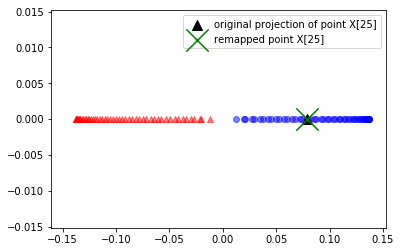

In [7]:
# visualizing the projection on the first principal component
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()